# **Downloading Dataset**

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

Mounted at /content/drive


In [2]:
! kaggle datasets download mohammadjavadtaghavi/hoda-0-9

Dataset URL: https://www.kaggle.com/datasets/mohammadjavadtaghavi/hoda-0-9
License(s): CC0-1.0


In [3]:
! unzip /content/hoda-0-9.zip

Archive:  /content/hoda-0-9.zip
  inflating: Hoda 0-9/0_1007.bmp     
  inflating: Hoda 0-9/0_1016.bmp     
  inflating: Hoda 0-9/0_1033.bmp     
  inflating: Hoda 0-9/0_1037.bmp     
  inflating: Hoda 0-9/0_1040.bmp     
  inflating: Hoda 0-9/0_1042.bmp     
  inflating: Hoda 0-9/0_1043.bmp     
  inflating: Hoda 0-9/0_1048.bmp     
  inflating: Hoda 0-9/0_1051.bmp     
  inflating: Hoda 0-9/0_1054.bmp     
  inflating: Hoda 0-9/0_1057.bmp     
  inflating: Hoda 0-9/0_106.bmp      
  inflating: Hoda 0-9/0_107.bmp      
  inflating: Hoda 0-9/0_1072.bmp     
  inflating: Hoda 0-9/0_1080.bmp     
  inflating: Hoda 0-9/0_1082.bmp     
  inflating: Hoda 0-9/0_1089.bmp     
  inflating: Hoda 0-9/0_1094.bmp     
  inflating: Hoda 0-9/0_1097.bmp     
  inflating: Hoda 0-9/0_1105.bmp     
  inflating: Hoda 0-9/0_1113.bmp     
  inflating: Hoda 0-9/0_1116.bmp     
  inflating: Hoda 0-9/0_1120.bmp     
  inflating: Hoda 0-9/0_1135.bmp     
  inflating: Hoda 0-9/0_114.bmp      
  inflating: Hoda 

# Dataset Building

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This code processes a directory containing images and stores their paths and labels in a structured DataFrame for further processing.

1. **Set the directory path**:
- The `dir_path` variable defines the path to the directory where the dataset of images is stored.

- In this case, the path is set to "/content/Hoda 0-9", which is a folder containing BMP image files.

2. **Get all BMP files**:
- The `os.listdir(dir_path)` function lists all files in the specified directory.

- The code then filters this list to include only those files that end with `.bmp`, ensuring that only BMP image files are selected.

3. **Create a DataFrame with image paths and labels**:
- The code constructs a Pandas DataFrame with two columns:
 - The `path` column contains the full paths of each image, which is created by
 combining the directory path and the filename.

 - The `label` column contains the label for each image, which is derived by taking the first character of the filename
  (assuming the label is the first character of the filename, e.g., `1_abc.bmp` would have a label of `1`).

# This DataFrame (`df`) provides a structured format with the paths and corresponding labels for each image,
# making it easier to process the images and use them in machine learning tasks.


In [5]:
# Define the directory
dir_path = "/content/Hoda 0-9"

# Get all BMP files
files = [f for f in os.listdir(dir_path) if f.endswith(".bmp")]

# Create DataFrame with path and label (first character of filename)
df = pd.DataFrame({
    "path": [os.path.join(dir_path, f) for f in files],
    "label": [f[0] for f in files]
})

In [6]:
# Function to read and resize images
def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
    img_resized = cv2.resize(img, (10, 10))  # Resize to 10x10
    return img_resized.flatten()  # Flatten the image into a 1D array

In [7]:
# Read and process images
df["image"] = df["path"].apply(process_image)

In [8]:
df.iloc[0, -1].shape

(100,)

- The shuffle_and_extract function takes a DataFrame (df) as input and shuffles its rows randomly using sample(frac=1). This ensures that the data is in a random order, which is crucial for training machine learning models.

- The np.random.seed(seed) ensures that the shuffling is reproducible, meaning the same shuffling will occur each time the code is run with the same seed.

- After shuffling, the function extracts the image and label columns from the DataFrame and returns them as x and y respectively. These are typically the features (images) and labels (targets) used for training.

This function is useful for preparing the dataset by shuffling the data before feeding it into a machine learning model, ensuring that the model is trained on a random subset of the data, improving its generalization.

In [9]:
def shuffle_and_extract(df, seed=42):
    np.random.seed(seed)
    df = df.sample(frac=1).reset_index(drop=True)
    x = df['image']
    y = df['label']

    return x, y

In [10]:
x, y =  shuffle_and_extract(df)

In [11]:
x = np.array(x)
y = np.array(y)

# **Splitting the Dataset into Training and Testing Sets**

- len(x) gives the total number of samples in the dataset.

- 0.7 represents the 70% of the dataset to be used for training.

- int(len(x) * 0.7) calculates the number of samples for the training set by multiplying the total number of samples by 0.7 and converting the result to an integer.

In [12]:
train_split = int(len(x) * 0.7)

In [13]:
x_train = x[:train_split]
y_train = y[:train_split]

In [14]:
x_test = x[train_split:]
y_test = y[train_split:]

- np.stack is a NumPy function used to join a sequence of arrays along a new axis (dimension).

- In this case, np.stack(x_train) and np.stack(x_test) combine the list of arrays in x_train and x_test into a single 2D or higher-dimensional NumPy array. This is useful when you have a list of arrays (e.g., images or data points) and want to convert them into a single array for further processing, such as training a machine learning model.

- It adds an extra dimension, making it easier to handle multi-dimensional data

In [15]:
x_train = np.stack(x_train)
x_test = np.stack(x_test)

# **Normalization**


Why We Normalize the Data:

In machine learning, normalization is a crucial step when working with image data. Here's why we normalize the pixel values:

1. **Pixel Value Range**:
   - Raw image data typically has pixel values in the range of [0, 255] for each color channel (Red, Green, Blue) in RGB images.
   - In grayscale images, the pixel values also range from 0 (black) to 255 (white).

2. **Normalization**:
   - Dividing the pixel values by 255 scales them from the range [0, 255] to [0, 1].
   - This makes sure that all pixel values are within a consistent range, which helps machine learning models to process the data more effectively.

In [16]:
x_train = x_train / 255
x_test = x_test / 255

# **MLPClassifier**

**1. MLPClassifier:**

- Source: sklearn.neural_network

- Purpose:
  - MLPClassifier is a supervised machine learning algorithm used for classification tasks.

  - It is a type of neural network that uses multiple layers of neurons to learn patterns in the data and make predictions.
  - The model can learn complex, non-linear relationships between features and the target variable.

- Key Concept:
  - MLPClassifier uses a feed-forward neural network architecture, where each neuron in a layer is connected to every neuron in the next layer.

  - The model is trained using backpropagation and optimization techniques (e.g., gradient descent) to minimize prediction errors.

**2. RandomizedSearchCV:**

- Source: sklearn.model_selection

- Purpose:
  - RandomizedSearchCV is a hyperparameter tuning technique that performs a random search over a specified distribution of hyperparameter values.

  - Unlike GridSearchCV, which evaluates all possible combinations of hyperparameters, RandomizedSearchCV samples a fixed number of random combinations, making it faster and less computationally expensive.
  - It uses cross-validation to evaluate the model’s performance for each combination of hyperparameters.

- How It Works:
  - A model (e.g., MLPClassifier) is fitted with random combinations of hyperparameters sampled from the specified distributions.

  - The model performance is evaluated using cross-validation, and the best combination of hyperparameters is selected based on the evaluation score.

---


**Why These Tools Are Important:**

1. MLPClassifier:
  - A powerful and flexible classifier capable of learning complex patterns in data.

  - Useful for tasks that require non-linear decision boundaries and are not easily handled by linear models.

2. RandomizedSearchCV:
  - A faster alternative to GridSearchCV for hyperparameter tuning.

  - Allows for efficient exploration of hyperparameter space, especially when there are many hyperparameters to tune.

---


**Summary:**

- MLPClassifier: A neural network classifier that can learn complex, non-linear relationships in the data.

- RandomizedSearchCV: A method to perform hyperparameter tuning by randomly sampling combinations of hyperparameters and evaluating model performance using cross-validation.


In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

**Purpose**

This line imports three essential evaluation metrics from the sklearn.metrics module. These metrics are widely used to evaluate the performance of classification models in machine learning.

---

1.accuracy_score

- What It Does

  - Computes the accuracy of the model, defined as the ratio of correctly predicted instances to the total number of instances.

- Use Case

  - Accuracy is a simple and intuitive metric to measure the performance of classification models, especially when the dataset is balanced (i.e., each class has roughly the same number of samples).

---

2.confusion_matrix

- What It Does

  - Constructs a matrix to summarize the performance of a classification algorithm by comparing the predicted labels (y_pred) with the actual labels (y_true).
  
  - The matrix shows:
   - True Positives (TP): Correct predictions for the positive class.

   - True Negatives (TN): Correct predictions for the negative class.

   - False Positives (FP): Incorrect predictions for the positive class (Type I error).

   - False Negatives (FN): Incorrect predictions for the negative class (Type II error).

- Use Case

  - The confusion matrix provides a detailed breakdown of the model's performance, including errors and correct classifications for each class.


---


3.classification_report

- What It Does

  - Generates a detailed textual report summarizing multiple performance metrics for each class:

   - Precision: Proportion of true positive predictions out of all positive predictions.

   - Recall (Sensitivity): Proportion of true positive predictions out of all actual positives.

   - F1-Score: The harmonic mean of precision and recall.

   - Support: The number of actual occurrences of each class in the dataset.

- Use Case

  - This report provides a comprehensive view of the model's performance for imbalanced datasets by focusing on precision, recall, and F1-score.

---

**Why This Code is Important**

1. Model Evaluation: These metrics allow you to evaluate the model’s ability to generalize and make accurate predictions.

2. Insightful Analysis:

  - Accuracy gives a quick snapshot of overall performance.

  - The confusion matrix provides granular details on how predictions align with actual labels.

  - The classification report offers class-wise performance metrics, which is particularly useful for imbalanced datasets.

---

Summary

- Imports tools to evaluate classification models.

- Provides insights into overall accuracy, detailed performance per class, and error types (e.g., false positives, false negatives).

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
mlp = MLPClassifier()

**Parameters of MLPClassifier Hyperparameter Grid (param_grid_mlp)**

- hidden_layer_sizes:
  - Specifies the number of neurons in each hidden layer.
  - Options:
    - (50, 20): A network with two hidden layers, the first with 50 neurons and the second with 20 neurons.

    - (100, 50): A network with two hidden layers, the first with 100 neurons and the second with 50 neurons.
    - (150, 100): A network with two hidden layers, the first with 150 neurons and the second with 100 neurons.
  - The number of neurons affects the network's capacity to learn from data; larger networks can learn more complex patterns but may also risk overfitting.

- activation:
  - Defines the activation function used in the hidden layers.
  - Options:
    - 'logistic': Sigmoid activation function, outputs values between 0 and 1.
    - 'tanh': Hyperbolic tangent activation function, outputs values between -1 and 1.

    - 'relu': Rectified Linear Unit activation function, outputs values between 0 and infinity, helping to mitigate the vanishing gradient problem.
  - The choice of activation function affects the model's ability to learn non-linear relationships.

- tol:
  - Tolerance for the optimization algorithm’s stopping criterion.
  - Options:
    - 0.000001: A very small tolerance, requiring a high degree of precision for convergence.

    - 0.0001: A moderate tolerance, balancing speed and precision.
    - 0.001: A larger tolerance, allowing the optimization to stop earlier, which might speed up the training process at the cost of precision.
  - Smaller values ensure the algorithm converges with greater precision but may increase computation time.

- momentum:
  - Momentum for the weight updates during training.
  - Options:
    - 0.9, 0.95, 0.99: Different momentum values, which control how much the previous weight update influences the current one.

  - Higher momentum helps accelerate learning, especially in areas of shallow gradients, but can lead to overshooting.

- solver:
  - Algorithm used for optimization.
  - Options:
    - 'lbfgs': Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm, good for smaller datasets and slow convergence.

    - 'sgd': Stochastic Gradient Descent, efficient for larger datasets but requires careful tuning of the learning rate.
    - 'adam': Adaptive moment estimation, an efficient algorithm that combines aspects of both momentum and adaptive learning rates.
  - The choice of solver affects both training speed and accuracy.

- alpha:
  - Regularization parameter to avoid overfitting by penalizing large weights.
  - Options:
    - 0.0001: A small regularization term.
    
    - 0.001: A slightly larger regularization term.
    - 0.01: A larger regularization term that could have a stronger effect in preventing overfitting.
  - Regularization helps improve model generalization by preventing overfitting, particularly when the dataset is small or noisy.


In [21]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50, 20), (100, 50), (150, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'tol': [0.000001, 0.0001, 0.001],
    'momentum': [0.9, 0.95, 0.99],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01]
}

In [22]:
mlp_grid = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid_mlp, scoring='accuracy', verbose=3, cv=3,
                        return_train_score=True, n_jobs=-1)

In [23]:
mlp_grid.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50, 20),
                                                               (100, 50),
                                                               (150, 100)],
                                        'momentum': [0.9, 0.95, 0.99],
                                        'solver': ['lbfgs', 'sgd', 'adam'],
                                        'tol': [1e-06, 0.0001, 0.001]},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [26]:
mlp_grid.best_params_

{'tol': 1e-06,
 'solver': 'adam',
 'momentum': 0.95,
 'hidden_layer_sizes': (100, 50),
 'alpha': 0.001,
 'activation': 'relu'}

In [27]:
mlp_grid.best_score_

np.float64(0.8670033670033671)

In [28]:
best_mlp = MLPClassifier(tol=1e-06, solver='adam', momentum=0.95, hidden_layer_sizes=(100, 50), alpha=0.001, activation= 'relu')

In [29]:
best_mlp.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50), momentum=0.95,
              tol=1e-06)

In [30]:
y_pred_test_mlp = best_mlp.predict(x_test)

In [31]:
y_pred_train_mlp = best_mlp.predict(x_train)

In [32]:
print(classification_report(y_pred_test_mlp, y_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.95      0.95      0.95        38
           2       0.76      0.85      0.80        46
           3       0.88      0.79      0.84        58
           4       0.77      0.82      0.80        57
           5       0.89      0.89      0.89        62
           6       0.84      0.79      0.81        58
           7       0.88      0.90      0.89        51
           8       0.92      0.92      0.92        50
           9       0.83      0.85      0.84        47

    accuracy                           0.86       510
   macro avg       0.86      0.86      0.86       510
weighted avg       0.86      0.86      0.86       510



In [33]:
print(classification_report(y_pred_train_mlp, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00       112
           5       1.00      1.00      1.00       109
           6       1.00      1.00      1.00       119
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       119
           9       1.00      1.00      1.00       111

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



In [34]:
print(confusion_matrix(y_pred_test_mlp, y_test))

[[36  2  0  0  0  4  0  1  0  0]
 [ 1 36  1  0  0  0  0  0  0  0]
 [ 0  0 39  2  2  1  1  0  1  0]
 [ 0  0  6 46  2  0  3  0  0  1]
 [ 0  0  3  2 47  1  2  1  1  0]
 [ 4  0  1  1  1 55  0  0  0  0]
 [ 0  0  0  0  3  0 46  2  1  6]
 [ 0  0  1  0  2  1  1 46  0  0]
 [ 0  0  0  1  0  0  0  2 46  1]
 [ 0  0  0  0  4  0  2  0  1 40]]


In [35]:
accuracy_score_mlp = accuracy_score(y_pred_test_mlp, y_test)
accuracy_score_mlp

0.8568627450980392

# **SVC**

**Source:** sklearn.svm

**Purpose:**

- SVC (Support Vector Classifier) is a supervised machine learning algorithm used for classification tasks.

- It constructs hyperplanes in a high-dimensional space to separate different classes.

- SVC is particularly effective for binary and multi-class classification tasks where the data is not linearly separable.

---

**Key Concept:**

- Support Vector Machines (SVM): SVC is based on the SVM algorithm, which finds the hyperplane that maximizes the margin between the closest data points of different classes (support vectors).

- Kernel Trick: Allows SVC to handle non-linear relationships by transforming the input space into a higher-dimensional space where data becomes linearly separable. Common kernels include:

  - Linear Kernel

  - Polynomial Kernel

  - Radial Basis Function (RBF) Kernel

  - Sigmoid Kernel

- Regularization (C): Controls the trade-off between achieving a low error on the training data and maximizing the margin. A smaller C value creates a wider margin with more misclassifications, while a larger C value aims to classify all points correctly.

- Gamma Parameter: Determines the influence of a single training example. Higher gamma values focus on closer data points, while lower values consider points farther away.

---

**How It Works:**

1.Hyperplane Construction:

- For binary classification, SVC finds the optimal hyperplane that separates data points of different classes with the largest possible margin.

2.Kernel Transformation:

- If the data is not linearly separable, SVC applies a kernel function to map data to a higher-dimensional space.

3.Classification:

- During prediction, SVC calculates on which side of the hyperplane a test data point lies to determine its class.

---

**Advantages:**

- Effective for Non-Linear Data: Kernels allow SVC to handle complex decision boundaries.

- High Accuracy: Often achieves strong performance, especially on smaller or medium-sized datasets.

- Robust to Overfitting: The regularization parameter C helps control model complexity.

---

**When to Use:**

- When the data has complex relationships that cannot be captured by linear models.

- For smaller datasets, as SVC can be computationally expensive on very large datasets.

- When a robust classifier is needed, and overfitting must be avoided.

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC()

**Parameters of SVC Hyperparameter Grid (param_grid_svc)**

- C:
  - Regularization parameter that controls the trade-off between achieving a low error on the training data and maintaining a simple decision boundary.

  - Options:
    - 0.1, 1, 10, 100, 1000: Different values of C that influence how much the model penalizes misclassifications. A smaller C allows more slack for errors, while a larger C makes the model more sensitive to errors.

- kernel:
  - Defines the kernel function used to map data into a higher-dimensional space.
  - Options:
    - 'linear': No transformation, suitable for linearly separable data.

    - 'poly': Polynomial kernel, allows for non-linear decision boundaries.
    - 'rbf': Radial Basis Function kernel, widely used for non-linear classification.
    - 'sigmoid': Sigmoid kernel, resembles a neural network activation function.
  - The kernel choice determines the decision boundary's complexity and is crucial for handling non-linearly separable data.

- degree:
  - Degree of the polynomial kernel function.
  - Options:
    - 2, 3, 4, 5: Different degrees of the polynomial kernel. Higher degrees allow for more complex decision boundaries but can lead to overfitting.

  - Relevant only if the 'poly' kernel is used.

- gamma:
  - Defines the influence of a single training example on the decision boundary.
  - Options:
    - 'scale': Uses 1 / (n_features * X.var()) for gamma, which is recommended for most cases.

    - 'auto': Uses 1 / n_features for gamma.
    - 0.001, 0.01, 0.1, 1: Different fixed values for gamma, where smaller values result in smoother decision boundaries and larger values create more complex boundaries.
  - The gamma value controls the range of influence for the support vectors.

- coef0:
  - Controls the influence of higher-order terms in the kernel.
  - Options:
    - 0.0, 0.1, 0.5, 1: Different values that affect the model’s complexity.

  - Relevant for polynomial and sigmoid kernels, where it affects how the kernel function behaves.


In [ ]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'coef0': [0.0, 0.1, 0.5, 1],
}

In [ ]:
svc_grid = RandomizedSearchCV(estimator=svc, param_distributions=param_grid_svc, scoring='accuracy', verbose=3, cv=3, return_train_score=True, n_jobs=-1)

In [ ]:
svc_grid.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'coef0': [0.0, 0.1, 0.5, 1],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
svc_grid.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'coef0': 0.1, 'C': 1000}

In [ ]:
svc_grid.best_score_

np.float64(0.9166666666666666)

In [38]:
best_svc = SVC(kernel='rbf', gamma='scale', degree=4, coef0= 0.1, C=1000)

In [39]:
best_svc.fit(x_train, y_train)

SVC(C=1000, coef0=0.1, degree=4)

In [40]:
y_pred_train_svc = best_svc.predict(x_train)

In [41]:
y_pred_test_svc = best_svc.predict(x_test)

In [42]:
print(classification_report(y_pred_test_svc, y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.97      0.90      0.94        41
           2       0.86      0.85      0.85        52
           3       0.94      0.89      0.92        55
           4       0.89      0.90      0.89        60
           5       0.90      0.97      0.93        58
           6       0.91      0.88      0.89        57
           7       0.96      0.98      0.97        51
           8       0.92      1.00      0.96        46
           9       0.90      0.91      0.91        47

    accuracy                           0.92       510
   macro avg       0.92      0.92      0.92       510
weighted avg       0.92      0.92      0.92       510



In [43]:
print(classification_report(y_pred_train_svc, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00       112
           5       1.00      1.00      1.00       109
           6       1.00      1.00      1.00       119
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       119
           9       1.00      1.00      1.00       111

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



In [44]:
print(confusion_matrix(y_pred_test_svc, y_test))

[[38  1  0  0  0  4  0  0  0  0]
 [ 1 37  1  0  0  0  2  0  0  0]
 [ 0  0 44  2  2  1  2  0  1  0]
 [ 0  0  3 49  2  0  0  0  0  1]
 [ 0  0  2  1 54  1  0  0  1  1]
 [ 2  0  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  2  0 50  2  0  3]
 [ 0  0  1  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  1  0  1  0  2 43]]


In [45]:
accuracy_score_svc = accuracy_score(y_pred_test_svc, y_test)
accuracy_score_svc

0.9156862745098039

# **Decision Tree**

**Source:** sklearn.tree

**Purpose:**

- DecisionTreeClassifier is a supervised learning algorithm used for classification tasks.

- It creates a tree-like structure where internal nodes represent conditions on features, branches represent decision rules, and leaf nodes represent class labels.

- Decision trees are interpretable and effective for both binary and multi-class classification problems.

---

**Key Concept:**

- Recursive Partitioning:

  - The algorithm splits the dataset into subsets based on feature values to maximize class separation.

- Impurity Measures:

  - Splits are determined using criteria like:

   - Gini Impurity: Measures the probability of misclassification.

   - Entropy: Measures the disorder or randomness in the dataset (used in information gain).

- Decision Rules:

  - Each decision in the tree corresponds to a feature condition that divides the data into more homogeneous groups.

- Tree Depth and Pruning:

  - The depth of the tree controls model complexity.

  - Overly deep trees can overfit, while pruning reduces the tree's size to enhance generalization.

---

**How It Works:**

1.Splitting:

- The algorithm evaluates all possible splits across features to select the one that minimizes impurity in the resulting subsets.

2.Recursive Growth:

- This process repeats until a stopping criterion is met, such as reaching maximum depth, achieving pure leaves, or having insufficient samples to split further.

3.Prediction:

- For a new data point, the tree navigates from the root to a leaf node by following decision rules, and the leaf node's label is the prediction.

---

**Advantages:**

- Interpretable: Provides clear, human-readable decision rules.

- Handles Non-Linear Data: Effectively captures complex relationships between features.

- Feature Importance: Identifies the most significant features in the dataset.

- No Preprocessing Needed: Handles categorical and numerical data without requiring scaling or normalization.

---

**When to Use:**

- When you need interpretable results for decision-making.

- When the dataset contains non-linear patterns that simpler models cannot capture.

- For small to medium-sized datasets, as decision trees can overfit on larger datasets without regularization or pruning.

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()

**Parameters of param_grid_dt**

criterion:

- Definition: The function used to measure the quality of a split.

- Options:

  - 'gini': Measures the impurity of nodes based on the Gini Impurity.

  - 'entropy': Uses information gain to evaluate splits.

  - 'log_loss': Considers the reduction in log loss for classification tasks.

- Purpose: Determines how the tree evaluates the "best" split at each node.

splitter:

- Definition: The strategy used to choose the split at each node.

- Options:

  - 'best': Chooses the best split based on the selected criterion.

  - 'random': Chooses a random split.

- Purpose: Provides flexibility in selecting splits, potentially reducing computation for large datasets.

max_depth:

- Definition: The maximum depth of the tree.

- Options: [None, 5, 10, 20, 50]

- Purpose:

  - None: The tree grows until all leaves are pure or other stopping criteria are met.

  - Specified values (e.g., 10, 20) limit the depth to prevent overfitting.

min_samples_split:

- Definition: The minimum number of samples required to split an internal node.

- Options: [2, 5, 10, 20]

- Purpose: Controls overfitting by ensuring nodes have enough data to justify further splitting.

min_samples_leaf:

- Definition: The minimum number of samples required to be at a leaf node.

- Options: [1, 2, 5, 10]

- Purpose: Helps prevent overly small leaf nodes, which can lead to overfitting.

max_features:

- Definition: The number of features to consider when looking for the best split.

- Options:

  - None: Considers all features.

  - 'sqrt': Square root of the total number of features.

  - 'log2': Logarithm (base 2) of the total number of features.

- Purpose: Reduces computational cost and promotes diverse splits.

max_leaf_nodes:

- Definition: Limits the maximum number of leaf nodes in the tree.

- Options: [None, 10, 20, 50]

- Purpose: Provides an upper bound on the complexity of the tree.

min_impurity_decrease:

- Definition: A node will be split if this split causes a decrease in impurity greater than or equal to this value.

- Options: [0.0, 0.01, 0.1]

- Purpose: Controls the growth of the tree by requiring a minimum improvement in impurity for a split.

class_weight:

- Definition: Weights associated with classes to handle imbalanced datasets.

- Options:

  - None: No weighting (all classes are treated equally).

  - 'balanced': Adjusts weights inversely proportional to class frequencies in the training data.

- Purpose: Addresses class imbalance by penalizing misclassifications in underrepresented classes.


In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'class_weight': [None, 'balanced'],
}

In [ ]:
dt_grid = RandomizedSearchCV(estimator = dt, param_distributions = param_grid_dt, verbose = 3, cv = 3, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [ ]:
dt_grid.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 5, 10, 20, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 10, 20, 50],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.1],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
dt_grid.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 50,
 'max_features': None,
 'max_depth': 20,
 'criterion': 'gini',
 'class_weight': None}

In [ ]:
dt_grid.best_score_

np.float64(0.6060606060606061)

In [48]:
best_dt = DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = 20, max_features = None, max_leaf_nodes = 50,
                                 min_impurity_decrease = 0.0, min_samples_leaf = 5 , min_samples_split = 5 , splitter = 'best')

In [49]:
best_dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=50, min_samples_leaf=5,
                       min_samples_split=5)

In [50]:
y_pred_train_dt = best_dt.predict(x_train)

In [51]:
y_pred_test_dt = best_dt.predict(x_test)

In [52]:
print(classification_report(y_pred_test_dt, y_test))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78        49
           1       0.76      0.64      0.70        45
           2       0.65      0.53      0.58        62
           3       0.62      0.70      0.65        46
           4       0.46      0.56      0.50        50
           5       0.61      0.88      0.72        43
           6       0.67      0.57      0.62        65
           7       0.67      0.67      0.67        52
           8       0.72      0.84      0.77        43
           9       0.65      0.56      0.60        55

    accuracy                           0.65       510
   macro avg       0.67      0.67      0.66       510
weighted avg       0.66      0.65      0.65       510



In [53]:
print(classification_report(y_pred_train_dt, y_train))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       144
           1       0.84      0.83      0.83       134
           2       0.77      0.73      0.75       118
           3       0.80      0.82      0.81       116
           4       0.69      0.71      0.70       108
           5       0.78      0.90      0.84        94
           6       0.82      0.74      0.78       133
           7       0.82      0.81      0.81       121
           8       0.83      0.95      0.89       104
           9       0.80      0.77      0.78       116

    accuracy                           0.80      1188
   macro avg       0.80      0.81      0.80      1188
weighted avg       0.81      0.80      0.80      1188



In [54]:
print(confusion_matrix(y_pred_test_dt, y_test))

[[35  5  0  0  3  3  1  0  1  1]
 [ 0 29  2  2  2  4  2  2  1  1]
 [ 0  0 33  7  9  3  2  3  2  3]
 [ 0  0  7 32  2  4  0  0  0  1]
 [ 0  2  4  2 28  3  5  3  1  2]
 [ 2  0  0  0  2 38  0  0  1  0]
 [ 3  1  2  4  7  1 37  4  1  5]
 [ 0  0  3  2  3  0  4 35  1  4]
 [ 0  0  0  0  1  4  2  0 36  0]
 [ 1  1  0  3  4  2  2  5  6 31]]


In [55]:
accuracy_score_dt = accuracy_score(y_pred_test_dt, y_test)
accuracy_score_dt

0.6549019607843137

# **Random Forest**

**Source:** sklearn.ensemble

**Purpose:**

- RandomForestClassifier is a supervised ensemble learning algorithm used for classification tasks.

- It builds multiple decision trees during training and combines their outputs (via majority voting) to make robust predictions.

**Key Concept:**

- Ensemble Learning: Combines predictions from multiple models (decision trees) to reduce overfitting and improve accuracy.

- Bagging: Each tree is trained on a randomly sampled subset of the training data (with replacement).

- Random Feature Selection: At each split, a random subset of features is considered to promote diversity among trees.

- Majority Voting: Each tree predicts a class, and the most voted class becomes the final prediction.

**How It Works:**

1. Bootstrap Sampling: Random subsets of the data are drawn (with replacement) to train individual decision trees.

2. Tree Construction: Trees are grown using these subsets, considering only a random subset of features at each split.

3. Prediction Aggregation: For classification tasks, each tree votes on the predicted class, and the majority vote determines the final output.

**Advantages:**

- Reduces overfitting compared to individual decision trees.

- Handles high-dimensional data effectively.

- Provides feature importance scores, which help in identifying the most relevant features.

**When to Use:**

- When accuracy and robustness are critical.

- When you need to interpret feature importance.

- When working with datasets that might overfit with simpler models like decision trees.

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier()

**Parameters of RandomForestClassifier**

- n_estimators:

  - Number of decision trees in the forest (default: 100).

  - Increasing this value can improve accuracy but increases computational cost.

- max_depth:

  - The maximum depth of each tree.

  - Limits tree size to prevent overfitting.

- min_samples_split and min_samples_leaf:

  - Minimum number of samples required to split a node or be a leaf, helping control overfitting.

- max_features:

  - Number of features to consider at each split.

  - Options include:

   - 'sqrt': Square root of the total number of features.

   - 'log2': Logarithm (base 2) of the total number of features.

- bootstrap:

  - Whether to use bootstrap sampling (default: True).
If False, the entire dataset is used for each tree.

In [ ]:
param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

In [ ]:
rfc_grid = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid_rfc, verbose=3, cv=3, scoring='accuracy', return_train_score=True, n_jobs=-1)

In [ ]:
rfc_grid.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
rfc_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
rfc_grid.best_score_

np.float64(0.8989898989898991)

In [58]:
best_rfc = RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)

In [59]:
best_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20)

In [60]:
y_pred_train_rfc = best_rfc.predict(x_train)

In [61]:
y_pred_test_rfc = best_rfc.predict(x_test)

In [62]:
print(classification_report(y_pred_test_rfc, y_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.97      0.86      0.91        43
           2       0.80      0.84      0.82        49
           3       0.88      0.84      0.86        55
           4       0.82      0.85      0.83        59
           5       0.85      0.95      0.90        56
           6       0.91      0.89      0.90        56
           7       0.94      0.94      0.94        52
           8       0.94      0.98      0.96        48
           9       0.94      0.92      0.93        49

    accuracy                           0.89       510
   macro avg       0.90      0.89      0.89       510
weighted avg       0.89      0.89      0.89       510



In [63]:
print(classification_report(y_pred_train_rfc, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       112
           3       1.00      1.00      1.00       119
           4       1.00      1.00      1.00       112
           5       1.00      1.00      1.00       109
           6       1.00      1.00      1.00       119
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       119
           9       1.00      1.00      1.00       111

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



In [64]:
print(confusion_matrix(y_pred_test_rfc, y_test))

[[37  1  0  0  0  4  0  1  0  0]
 [ 2 37  1  0  1  0  2  0  0  0]
 [ 0  0 41  4  4  0  0  0  0  0]
 [ 0  0  7 46  0  0  1  0  0  1]
 [ 0  0  1  2 50  4  0  0  2  0]
 [ 2  0  0  0  1 53  0  0  0  0]
 [ 0  0  0  0  2  0 50  2  0  2]
 [ 0  0  1  0  0  1  1 49  0  0]
 [ 0  0  0  0  1  0  0  0 47  0]
 [ 0  0  0  0  2  0  1  0  1 45]]


In [65]:
accuracy_score_rfc = accuracy_score(y_pred_test_rfc, y_test)
accuracy_score_rfc

0.8921568627450981

# **Making a table for results of methods**

              Model  Accuracy Score
Rank                               
1               MLP        0.915686
2     Random Forest        0.892157
3               SVc        0.856863
4     Decision Tree        0.654902


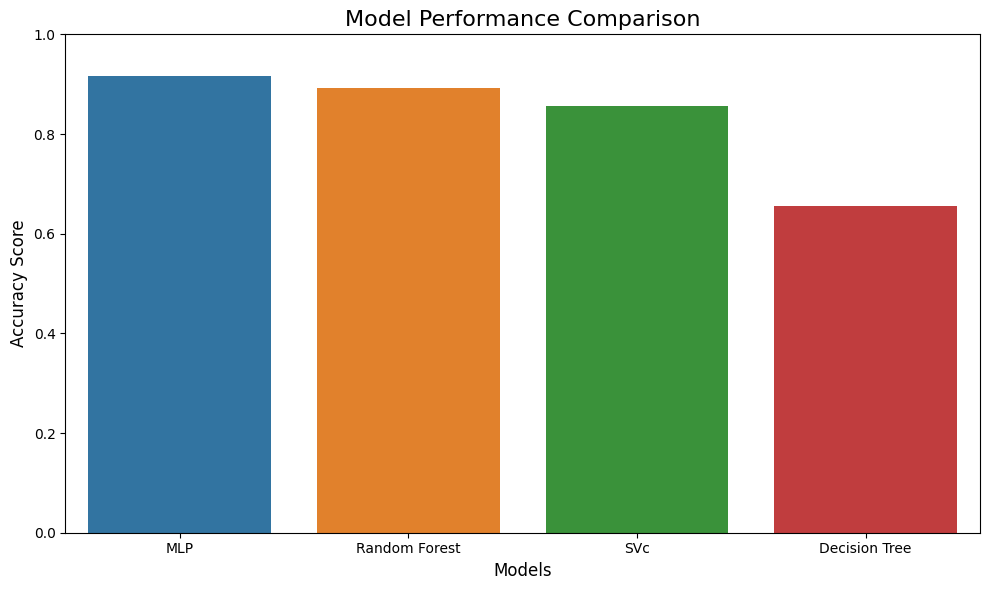

In [66]:
# Create a dictionary with model names and their corresponding scores
results = {
    "Model": ["SVc", "Decision Tree", "Random Forest", "MLP"],

    "Accuracy Score": [accuracy_score_mlp, accuracy_score_dt, accuracy_score_rfc, accuracy_score_svc]

}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Sort by MAE and MSE in descending order (lower is better)
df_results = df_results.sort_values(by=["Accuracy Score"], ascending=[False]).reset_index(drop=True)

# Add Rank column
df_results.index += 1  # Start index from 1
df_results.index.name = "Rank"

# Display the results table
print(df_results)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy Score', data=df_results, hue='Model', legend=False)

# Add titles and labels
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)

# Show the plot without any text
plt.tight_layout()
plt.show()


# **Handwritten Image Classification: Model Evaluation & Insights**

## **Purpose of the Work**

The goal of this project is to develop and evaluate machine learning models for handwritten digit classification. The primary objectives include:

### **1. Understanding Model Performance**
- Evaluate different classification models using **Accuracy** as the primary metric to determine which model performs best.

- Identify models that **overfit, underfit, or generalize well** to unseen data.
- Determine whether the relationship between features (image pixels) and target labels (digit classes) is best captured by a **linear or non-linear model**.

### **2. Comparing Machine Learning Models**
The following models were evaluated:
- **Multi-Layer Perceptron (MLP)**
- **Random Forest**

- **Support Vector Classifier (SVC)**
- **Decision Tree**

By comparing their performance, we aim to identify the most effective model for handwritten digit classification.

### **3. Identifying the Best Model**
- The best model should have the **highest accuracy** and demonstrate good generalization capabilities.

- Poorly performing models may indicate issues like **overfitting, underfitting, or poor feature representation**.
- The results will help guide future improvements, such as **hyperparameter tuning** or trying additional models.

---

## **Key Insights from the Results**

### ✅ **Best Model: MLP**
- **Highest Accuracy (91%)**.

- The **MLP** (Multi-Layer Perceptron) achieved the highest accuracy score, indicating that it is the best model for this handwritten digit classification task.
- **MLP**, being a **neural network model**, is capable of learning complex non-linear patterns, making it well-suited for image classification tasks where the relationship between pixels and the class labels is non-linear.

### ⚠️ **Random Forest: A Close Second**
- **Accuracy: 89%**.

- The **Random Forest** model performed almost as well as the MLP, with only a slight difference in accuracy.
- Random Forest is an **ensemble method** that works by combining the results of multiple decision trees. It performed well, likely due to its ability to capture complex patterns without overfitting.
- Slight improvements in performance could be achieved by **hyperparameter tuning** (e.g., increasing the number of trees).

### 🟠 **SVC: Slightly Behind**
- **Accuracy: 85%**.
- The **Support Vector Classifier (SVC)** performed decently but lagged behind MLP and Random Forest.
- SVC is typically effective in high-dimensional spaces, which suits image data. However, its performance suggests that **feature scaling** and **kernel selection** might need fine-tuning for optimal results on this dataset.

### ❌ **Decision Tree: The Worst Performing Model**
- **Accuracy: 65%**.

- The **Decision Tree** model showed the lowest accuracy, indicating that it struggled to generalize well to unseen data.
- Decision trees are prone to **overfitting** when not properly pruned or regularized. The model might have learned to fit the training data too closely, which harmed its performance on the test data.
- This result suggests that more **complex models like MLP or Random Forest** can better capture the underlying patterns in the data compared to a simple decision tree.

---


## **Conclusion**
- **MLP is the best-performing model**, achieving the highest accuracy. This highlights the **non-linear nature** of the classification problem, where deep learning models (like MLP) excel in recognizing patterns in image data.

- **Random Forest** follows closely and could potentially improve further with **hyperparameter tuning**.
- **SVC** showed good performance but could benefit from better tuning, especially in terms of **kernel choice** and **feature scaling**.
- **Decision Tree** is the least effective, likely due to **overfitting**. A more complex model is required to improve generalization.


